# Customer Personality Analysis

#### Group 7 Members: Tustin Choa, Margaret Inguillo, Ryan Villanueva

## Notebook Setting Up

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
stats_df = pd.read_csv("marketing_campaign.csv", sep="\t")

## Data Representation

In [3]:
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

This dataset is about customer personality types. It contains 2240 observations and 29 variables. These variables are grouped into 4 major categories: People, products, promotion, and place. The dataset was created in order to help companies create products that may be sold to a certain group of people with similar traits. It was likely that the information was gathered through the company's website in the form of cookies, as well as, through membership data. 

Listed below are the variables per category and their interpretation:                           
**People**                                   
ID: Unique number assigned to every customer                               
Year_Birth: Customer's year of birth                                   
Education: Customer's education attainment                             
Marital_Status: Customer's marital status                                
Income: Customer's yearly income                                  
Kidhome: Number of children a customer has                                                       
Teenhome: How many of the children are teenagers                            
Dt_Customer: Customer's date of enrollment at the company                     
Recency: Number of days since customer's last purchase                                
Complain: 1 if a complain was made by the customer in the last 2 years , 0 otherwise                      

**Products**                                                            
MntWines: Expenses on wine in the last 2 years                 
MntFruits: Expenses on fruits in the last 2 years                                    
MntMeatProducts: Expenses on meat in the last 2 years                                   
MntFishProducts: Expenses on fish in the last 2 years                                           
MntSweetProducts: Expenses on sweets the in last 2 years                            
MntGoldProds: Expenses on gold in the last 2 years                       

**Promotion**                                     
NumDealsPurchases: The number of discounted purchases
AcceptedCmp1: 1 if customer bought an offer in the 1st campaign, 0 otherwise                    
AcceptedCmp2: 1 if customer bought an offer in the 2nd campaign, 0 otherwise                     
AcceptedCmp3: 1 if customer bought an offer in the 3rd campaign, 0 otherwise                     
AcceptedCmp4: 1 if customer bought an offer in the 4th campaign, 0 otherwise                              
AcceptedCmp5: 1 if customer bought an offer in the 5th campaign, 0 otherwise                             
Response: 1 if customer bought an offer in the 6th campaign, 0 otherwise                     

**Place**                                          
NumWebPurchases: The number of online purchases                                    
NumCatalogPurchases: The number of purchases through a catalogue                               
NumStorePurchases: The number of purchases made directly in stores                             
NumWebVisitsMonth: The number of visits to company’s web site in the last month 
 

## Data Cleaning

A sample size of 100 random observations was taken from the 2240 total observations for this study

In [4]:
n = 100 # sample size
sample_stats_df = stats_df.sample(n, random_state=8)

Missing values were checked for and none were found

In [5]:
sample_stats_df.isnull().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

Dropping variables that won't be used for this notebook

In [6]:
sample_stats_df=sample_stats_df.loc[:, ~sample_stats_df.columns.isin(['Z_Revenue', 'Z_CostContact', 'MntGoldProds'])]

Checking for inconsistencies in data

In [7]:
sample_stats_df["Education"].unique()

array(['2n Cycle', 'Master', 'Graduation', 'PhD', 'Basic'], dtype=object)

In [8]:
sample_stats_df["Marital_Status"].unique()

array(['Married', 'Together', 'Single', 'Divorced', 'Widow'], dtype=object)

## Exploratory Data Analysis

Shows the first 10 observations from the dataset

In [9]:
sample_stats_df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
1317,4937,1973,2n Cycle,Married,46094.0,1,1,10-06-2014,62,12,...,0,3,7,0,0,0,0,0,0,0
1175,1604,1960,Master,Married,47353.0,0,1,13-11-2013,93,184,...,2,6,5,0,0,0,0,0,0,0
1451,6652,1965,Graduation,Married,77343.0,0,0,09-06-2014,28,227,...,4,9,1,0,0,0,0,0,0,0
1010,5236,1979,Graduation,Together,77568.0,0,1,25-08-2012,30,1230,...,2,8,5,0,1,1,1,0,0,0
2158,5186,1955,PhD,Married,58482.0,0,1,12-03-2014,59,576,...,4,9,6,0,1,0,0,0,0,0
1757,3524,1971,Master,Single,39763.0,1,0,04-08-2013,9,80,...,1,2,9,0,0,0,0,0,0,1
463,7059,1963,Graduation,Married,80124.0,0,0,26-06-2014,47,483,...,7,8,1,1,0,0,0,0,0,0
1271,7488,1963,Master,Single,64191.0,0,1,22-01-2013,30,420,...,3,13,3,0,0,0,0,0,0,0
408,5049,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,0,2,9,0,0,0,0,0,0,0
956,5748,1965,Graduation,Married,59754.0,0,1,01-12-2012,96,115,...,2,6,5,0,0,0,0,0,0,1


### Education


Categorizes people by their educational attainment


In [10]:
edu_group_count = sample_stats_df.groupby(["Education"])['ID'].count()
edu_group_count

Education
2n Cycle       7
Basic          5
Graduation    49
Master        15
PhD           24
Name: ID, dtype: int64

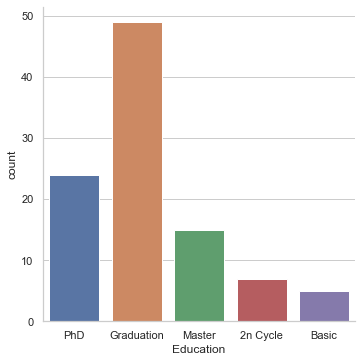

In [11]:
sns.set_theme(style="whitegrid")

edu_plot = sns.catplot(x="Education", kind="count", order=['PhD', 'Graduation', 'Master', '2n Cycle', 'Basic'], data=sample_stats_df)

> Among the different educational attainments, most of them are customers who are expecting graduation.

Computes for average income per educational attainment type

In [150]:
edu_income_df=sample_stats_df.groupby(["Education"])["Income"].agg(['mean', 'count'])
edu_income_df=edu_income_df.rename(columns={"mean": "ave_income", "count": "total_indv"}, errors="raise")
edu_income_df

,ave_income,total_indv
Education,,
2n Cycle,61259.714286,7
Basic,26659.600000,5
Graduation,62142.122449,49
Master,49447.333333,15
PhD,52871.291667,24


<AxesSubplot:xlabel='Education'>

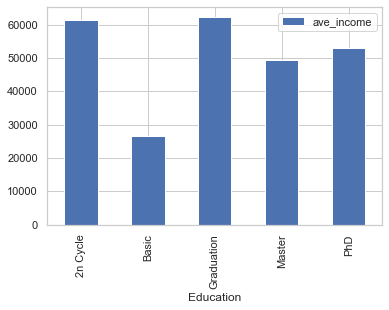

In [152]:
edu_income_df=sample_stats_df.groupby(["Education"])["Income"].agg(['mean'])
edu_income_df=edu_income_df.rename(columns={"mean": "ave_income"}, errors="raise")
edu_income_df.plot(kind = "bar")

> Among the educational attainments, enrolled customers who attained Basic Education have the lowest average income, while graduates have the highest avaerage income (ave_income)

### Marital Status

Checks for inconsistencies in `Marital_Status`

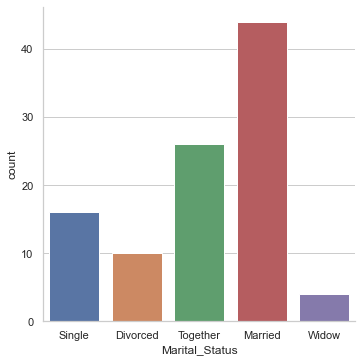

In [13]:
sns.set_theme(style="whitegrid")

edu_plot = sns.catplot(x="Marital_Status", kind="count", order=['Single', 'Divorced', 'Together', 'Married', 'Widow'], data=sample_stats_df)

> Based from marital status, most enrollees are customers who are married.

Computes for average income per marital status type

In [14]:
ms_income_df=sample_stats_df.groupby(["Marital_Status"])["Income"].agg(['mean', 'count'])
ms_income_df=ms_income_df.rename(columns={"mean": "ave_income", "count": "total_indv"}, errors="raise")
ms_income_df

,ave_income,total_indv
Marital_Status,,
Divorced,75658.000000,10
Married,55368.613636,44
Single,53983.937500,16
Together,53173.461538,26
Widow,44662.250000,4


<AxesSubplot:xlabel='Marital_Status'>

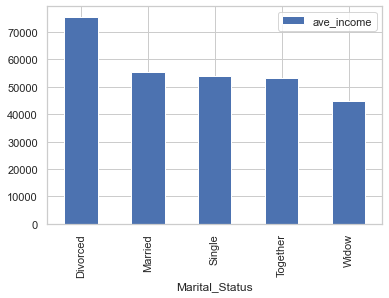

In [28]:
ms_income_df=sample_stats_df.groupby(["Marital_Status"])["Income"].agg(['mean'])
ms_income_df=ms_income_df.rename(columns={"mean": "ave_income"}, errors="raise")
ms_income_df.plot(kind="bar")

> Enrolled customers who are divorced has garnered the highest average income compared those who are single, widow, couple (Together), and married. 

## Expenses
Combines fields related to expenses on food

Computing the sum of expenses related to expenses on food

In [15]:
sample_stats_df["Total_Exp"] = sample_stats_df['MntWines'] + sample_stats_df['MntFruits'] + sample_stats_df['MntMeatProducts'] + sample_stats_df['MntFishProducts'] + sample_stats_df['MntSweetProducts']
sample_stats_df[["MntWines","MntFruits","MntMeatProducts","MntFishProducts", "MntSweetProducts", "Total_Exp"]]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,Total_Exp
1317,12,2,20,3,2,39
1175,184,2,19,8,8,221
1451,227,151,573,98,54,1103
1010,1230,0,396,232,178,2036
2158,576,7,115,19,7,724
...,...,...,...,...,...,...
2009,561,14,113,10,14,712
1899,378,14,68,19,14,493
603,410,16,114,0,5,545
197,519,17,813,27,173,1549


## Children 
Combines fields to get the number of children a customer has


In [16]:
sample_stats_df["Total_Children"] = sample_stats_df["Kidhome"] + sample_stats_df["Teenhome"]
Children_group_count = sample_stats_df.groupby(["Total_Children"])['ID'].count()
Children_group_count

Total_Children
0    29
1    56
2    15
Name: ID, dtype: int64

In [17]:
sample_stats_df["Total_Children"].unique()

array([2, 1, 0], dtype=int64)

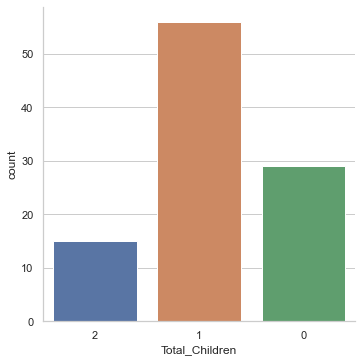

In [18]:
sns.set_theme(style="whitegrid")

edu_plot = sns.catplot(x="Total_Children", kind="count", order=[2,1,0], data=sample_stats_df)

> Most enrolled customers have only one child.

## Campaigns
Shows number of campaigns attended by a customer

Computes the total number of offers accepted out of the 6 campaigns per customer

In [19]:
sample_stats_df["Total_Cam"] = sample_stats_df["AcceptedCmp3"] + sample_stats_df["AcceptedCmp4"] + sample_stats_df["AcceptedCmp5"] + sample_stats_df["AcceptedCmp1"] + sample_stats_df["AcceptedCmp2"] + sample_stats_df["Response"]
sample_stats_df["Total_Cam"].unique()

array([0, 3, 1, 2, 5, 4], dtype=int64)

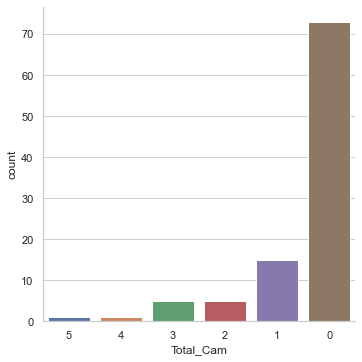

In [20]:
edu_plot = sns.catplot(x="Total_Cam", kind="count", order=[5,4,3,2,1,0], data=sample_stats_df)

> Most enrolled customers did not accept any offers out of the 6 campaigns.

**Relationship between Number of Campaigns Attended to Total Expenses**

In [146]:
numchild_income_df=sample_stats_df.groupby(["Total_Cam"])["Total_Exp"].agg(['count','mean', 'median', 'std','min', 'max'])
numchild_income_df=numchild_income_df.rename(columns={"count":"num_customer","mean": "ave_income"}, errors="raise")
q_cam_exp = sample_stats_df.groupby(["Total_Cam"],as_index=True)[["Total_Exp"]].quantile(q=[0.75, 0.25])
display(numchild_income_df)
display(q_cam_exp)
#pd.merge(numchild_income_df,q_totalexp,on=["Total_Cam"])

,num_customer,ave_income,median,std,min,max
Total_Cam,,,,,,
0,73,495.369863,395,466.558008,5,1698
1,15,587.000000,590,439.051250,38,1549
2,5,1249.600000,1214,306.915786,904,1667
3,5,1527.600000,1682,512.111609,769,2036
4,1,1920.000000,1920,NaN,1920,1920
5,1,1649.000000,1649,NaN,1649,1649


Total_Exp
Total_Cam                
0         0.75      783.0
          0.25       53.0
1         0.75      739.5
          0.25      259.0
2         0.75     1433.0
          0.25     1030.0
3         0.75     1881.0
          0.25     1270.0
4         0.75     1920.0
          0.25     1920.0
5         0.75     1649.0
          0.25     1649.0

> The two tables presented above are the number of customers (num_customer), average of income (ave_income), the 50th percentile (median), minimum (min), maximum (max), and standard deviation (std) among the total expenses, and the third (0.75) and first (0.25) quantile of the total expenses of each total number of customers attended the campaign.

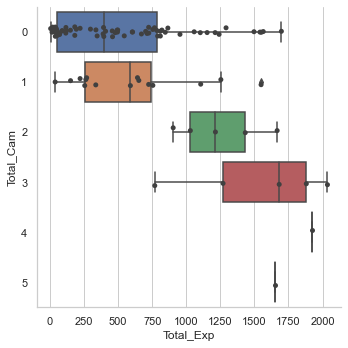

In [141]:
#edu_plot = sns.catplot(x="Total_Cam", y="Total_Exp", order=[5,4,3,2,1,0], data=sample_stats_df)
# sns.catplot(x="Total_Cam", y="Total_Exp", order=[0,1,2,3,4,5], data=sample_stats_df, color=".25")
# sns.boxplot(x="Total_Cam", y="Total_Exp", data=sample_stats_df,order=[0,1,2,3,4,5])
#sample_stats_df.boxplot(by ='Total_Cam', column =['Total_Exp'], grid = False)
sample_stats_df[["Total_Cam", "Total_Exp"]]
sns.catplot(x="Total_Exp", y="Total_Cam", order=[0,1,2,3,4,5], data=sample_stats_df, color=".25", orient="h")
sns.boxplot(x="Total_Exp", y="Total_Cam", data=sample_stats_df,order=[0,1,2,3,4,5],orient="h")
plt.tight_layout()

> There are some counted only one (1) enrolled customer who accepted 4 or 5 offers out of the 6 campaigns, there is no variability on the total of expenses amongst the total number of accepted offers in a campaign. The visual presented would indiciate that a customer spends more upon accepting offers in a campaign. Moreover, among the customers who did not attend any campaigns out of the 6 campaigns (Total_Cam = 0) is positively-skewed, which means that there are more customers who has less expenses compared those who have a lot of expenses. 


**Relationship between Number of Children to Total Expenses**

In [147]:
numchild_exp_df=sample_stats_df.groupby(["Total_Children"])["Total_Exp"].agg(['count','mean', 'median', 'std','min', 'max'])
numchild_exp_df=numchild_exp_df.rename(columns={"count":"num_customer","mean": "ave_exp"}, errors="raise")
q_child_exp = sample_stats_df.groupby(["Total_Children"],as_index=True)[["Total_Exp"]].quantile(q=[0.75, 0.25])
display(numchild_exp_df)
display(q_child_exp)

,num_customer,ave_exp,median,std,min,max
Total_Children,,,,,,
0,29,1070.586207,1214.0,580.065545,5,1920
1,56,485.660714,391.5,442.042955,15,2036
2,15,278.533333,193.0,264.723809,39,821


Total_Exp
Total_Children                
0              0.75    1549.00
               0.25     755.00
1              0.75     732.25
               0.25     109.50
2              0.75     476.50
               0.25      49.50

> The two tables presented above are the total number of customers (num_customer), average of expenses (ave_income), the 50th percentile among the total expenses (median), minimum (min), maximum (max),  standard deviation (std), and the third (0.75) and first (0.25) quantile of the total expenses of each total number of customers with the same number of children.

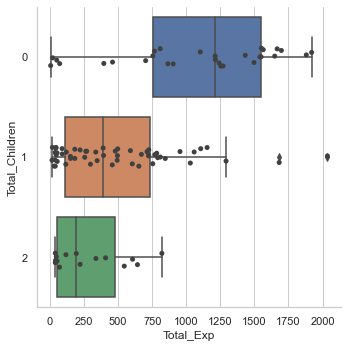

In [144]:
sample_stats_df[["Total_Children", "Total_Exp"]]
#edu_plot = sns.catplot(x="Total_Children", y="Total_Exp", order=[2,1,0], data=sample_stats_df)
sns.catplot(x="Total_Exp", y="Total_Children", order=[0,1,2], data=sample_stats_df, color="0.25", orient="h")
sns.boxplot(x="Total_Exp", y="Total_Children", data=sample_stats_df,order=[0,1,2], orient="h")
#sample_stats_df.boxplot(by ='Total_Children', column =['Total_Exp'], grid = False)
plt.tight_layout()


**Frquency of Online Purchases by PhD Graduates**

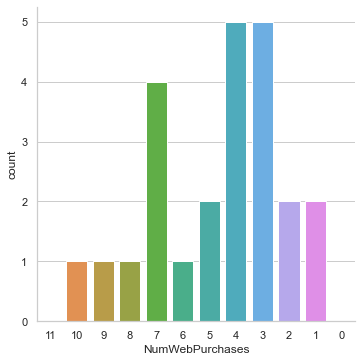

In [23]:
PHD_stats_df=sample_stats_df[sample_stats_df["Education"]== 'PhD']
sns.set_theme(style="whitegrid")
edu_plot = sns.catplot(x="NumWebPurchases", kind="count", order=[11,10,9,8,7,6,5,4,3,2,1,0] ,data=PHD_stats_df)

**Frequency of Online Purchases by Normal Graduates**

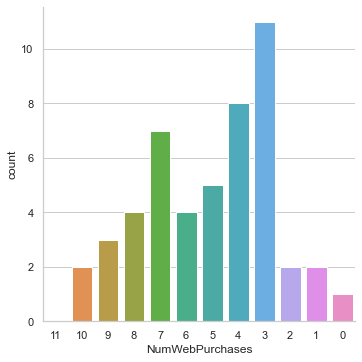

In [24]:
Grad_stats_df=sample_stats_df[sample_stats_df["Education"]== 'Graduation']
sns.set_theme(style="whitegrid")
edu_plot = sns.catplot(x="NumWebPurchases", kind="count", order=[11,10,9,8,7,6,5,4,3,2,1,0] ,data=Grad_stats_df)

## Research Question

1. Does the number of campaigns attended affect the amount spent on grocery products?
2. 
3. Is there a significant difference between the number of web purchases done by PhD and Normal Graduates?

## Statistical Inference

#### Research Question 3
**H0**: There is no significant difference between the number of web purchases made by PhD and Normal Graduates.       
**Ha**: There is a significant difference between the number of web purchases made by PhD and Normal Graduates.

In [25]:
count_df= PHD_stats_df.groupby(['NumWebPurchases', 'Education'])['ID'].count() 
count_df1= Grad_stats_df.groupby(['NumWebPurchases', 'Education'])['ID'].count() 

Mix_df=pd.merge(count_df, count_df1, on=["NumWebPurchases"])
Mix_df.columns=["PhD", "Grad"]
Mix_df

,PhD,Grad
NumWebPurchases,,
1,2,2
2,2,2
3,5,11
4,5,8
5,2,5
6,1,4
7,4,7
8,1,4
9,1,3


Get p value via Chi-square test.

In [26]:
g, p, dof, expctd=chi2_contingency(Mix_df)
print(p)
print ("Significance: p>0.05")

0.9873486816090047
Significance: p>0.05


## Insights and Conclusions


For research question 3
Based on the p-value outcome, there is a significant difference between web purchases made by PhD and Normal Graduates.